**Cargar librerias necesarias**

In [60]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
import mlflow
import mlflow.tensorflow
import time


**Cargar datos**

In [61]:
df = pd.read_csv('listings_limpio.csv')
df.head()

,id,host_response_rate,host_acceptance_rate,neighbourhood_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,Safe,Refrigerator,Smoke_alarm_home_safety,Essentials,Services,property_Entire_Place,property_Hotel_Room,property_Other,property_Private_Room,property_Shared_Room
0,30320,100,100,Sol,40.41476,-3.70418,2,1.0,1.0,2.0,...,0,0,0,0,0,True,False,False,False,False
1,40916,100,100,Universidad,40.42247,-3.70577,2,1.0,1.0,3.0,...,0,0,0,0,0,True,False,False,False,False
2,62423,100,99,Justicia,40.41884,-3.69655,4,1.5,1.0,2.0,...,0,1,1,1,0,False,False,False,True,False
3,70073,100,100,Universidad,40.42252,-3.70250,2,1.0,1.0,1.0,...,0,1,0,1,1,True,False,False,False,False
4,70310,100,100,Universidad,40.42252,-3.70250,2,1.0,1.0,2.0,...,0,1,0,1,1,True,False,False,False,False


Eliminar "neighbourhood_cleansed" ya que es redundante contar con esto al tener la longitu y latitud y ID ya que no es información redundante

In [62]:
df["neighbourhood_cleansed"]
df.drop(columns=["neighbourhood_cleansed","id"], inplace=True)

Codificar booleanas como 1 y 0 

In [63]:
bool_cols = df.select_dtypes(include="bool").columns
df[bool_cols] = df[bool_cols].astype(int)

df.head()

,host_response_rate,host_acceptance_rate,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,Safe,Refrigerator,Smoke_alarm_home_safety,Essentials,Services,property_Entire_Place,property_Hotel_Room,property_Other,property_Private_Room,property_Shared_Room
0,100,100,40.41476,-3.70418,2,1.0,1.0,2.0,157.0,5,...,0,0,0,0,0,1,0,0,0,0
1,100,100,40.42247,-3.70577,2,1.0,1.0,3.0,143.0,5,...,0,0,0,0,0,1,0,0,0,0
2,100,99,40.41884,-3.69655,4,1.5,1.0,2.0,65.0,1,...,0,1,1,1,0,0,0,0,1,0
3,100,100,40.42252,-3.70250,2,1.0,1.0,1.0,116.0,30,...,0,1,0,1,1,1,0,0,0,0
4,100,100,40.42252,-3.70250,2,1.0,1.0,2.0,79.0,30,...,0,1,0,1,1,1,0,0,0,0


**Separar en train y test**

In [64]:
train = df.sample(frac=0.8, random_state=100)
train.head()

,host_response_rate,host_acceptance_rate,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,Safe,Refrigerator,Smoke_alarm_home_safety,Essentials,Services,property_Entire_Place,property_Hotel_Room,property_Other,property_Private_Room,property_Shared_Room
2415,100,92,40.406490,-3.745560,4,1.0,1.0,1.0,117.0,2,...,0,1,1,1,1,1,0,0,0,0
11422,50,40,40.421990,-3.702730,3,1.0,1.0,1.0,158.0,1,...,0,0,0,0,0,1,0,0,0,0
13907,33,17,40.473280,-3.704860,1,1.0,1.0,1.0,34.0,3,...,0,0,0,0,0,0,0,0,1,0
2120,100,100,40.333614,-3.702798,2,1.0,1.0,2.0,93.0,2,...,0,1,1,1,1,1,0,0,0,0
5370,99,99,40.447750,-3.708190,4,1.0,1.0,2.0,118.0,1,...,0,1,0,1,1,1,0,0,0,0


In [65]:
test = df.drop(train.index)
test.head()

,host_response_rate,host_acceptance_rate,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,Safe,Refrigerator,Smoke_alarm_home_safety,Essentials,Services,property_Entire_Place,property_Hotel_Room,property_Other,property_Private_Room,property_Shared_Room
26,100,100,40.41285,-3.69553,4,1.0,1.0,2.0,157.0,3,...,0,1,1,1,1,1,0,0,0,0
27,100,81,40.41015,-3.69797,2,1.0,1.0,2.0,95.0,5,...,0,1,1,1,1,1,0,0,0,0
40,86,95,40.41941,-3.70823,2,1.0,1.0,1.0,139.0,3,...,0,1,0,1,1,1,0,0,0,0
45,100,100,40.41155,-3.69492,1,1.0,2.0,1.0,50.0,3,...,0,1,1,1,1,0,0,0,1,0
48,83,8,40.41412,-3.70057,1,2.0,1.0,3.0,101.0,1,...,0,1,0,1,0,0,0,0,1,0


In [66]:
print(train.shape)
print(test.shape)

(14131, 38)
(3533, 38)


**Separar X y Y**

In [67]:
y_train = train['price']
y_test = test['price']
x_train = train.drop(columns=['price'])
x_test = test.drop(columns=['price'])

**Construir el modelo usando tensorfloww**

capa de normalización

In [68]:
tf.keras.layers.Normalization

keras.src.layers.preprocessing.normalization.Normalization

In [69]:
norm = tf.keras.layers.Normalization()
norm.adapt(np.array(x_train))
norm.mean.numpy()
norm.variance.numpy()
np.sqrt(norm.variance.numpy())
norm(x_train).numpy()

array([[ 0.4210826 ,  0.23352788, -0.69530004, ..., -0.05327937,
        -0.5463031 , -0.07870716],
       [-1.882206  , -1.7946874 , -0.0242777 , ..., -0.05327937,
        -0.5463031 , -0.07870716],
       [-2.6653242 , -2.6917827 ,  2.1963885 , ..., -0.05327937,
         1.8304855 , -0.07870716],
       ...,
       [ 0.4210826 , -1.5216584 ,  0.0485554 , ..., -0.05327937,
        -0.5463031 , -0.07870716],
       [ 0.4210826 ,  0.07751133,  1.2941499 , ..., -0.05327937,
         1.8304855 , -0.07870716],
       [ 0.4210826 , -0.4295425 ,  0.21255372, ..., -0.05327937,
         1.8304855 , -0.07870716]], dtype=float32)

**Entrenar modelo multicapa**

In [ ]:
def elu_plus_one(x):
    return tf.keras.activations.elu(x) + 1.0
dnn_model = tf.keras.Sequential([
      tf.keras.layers.Input(shape=(x_train.shape[1],)),
      norm,
      tf.keras.layers.Dense(12, activation=elu_plus_one),
      tf.keras.layers.Dense(16, activation=elu_plus_one),
      tf.keras.layers.Dense(1)
  ])

dnn_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.01))

dnn_model.summary()

import time

t0 = time.time()
history = dnn_model.fit(
    x_train,
    y_train,
    validation_split=0.3,
    epochs=100
)
t1 = time.time()

print(history.history.keys())
print(len(history.history.get('loss', [])))
print(len(history.history.get('val_loss', [])))


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization) │ (None, 37)             │            75 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 12)             │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 16)             │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 756 (2.96 KB)

 Trainable params: 681 (2.66 KB)

 Non-trainable params: 75 (304.00 B)

Epoch 1/100
213/310 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 92.8032

In [ ]:
dnn_model.save("red neuronal_airbnb.keras")

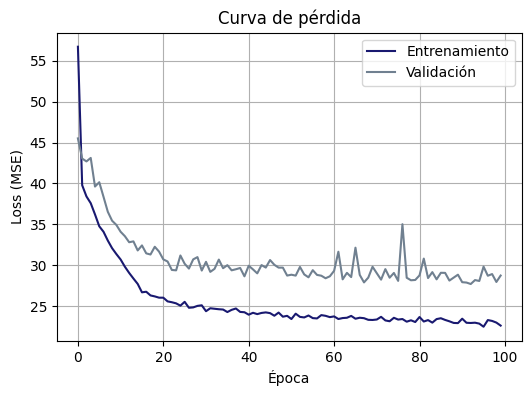

In [54]:
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Entrenamiento', color = "midnightblue")
plt.plot(history.history['val_loss'], label='Validación', color = "slategray")
plt.xlabel('Época')
plt.ylabel('Loss (MSE)')
plt.title('Curva de pérdida')
plt.legend()
plt.grid(True)
plt.show()

**Evaluar el modelo**

In [55]:
test_res = {}
test_res['dnn_model'] = dnn_model.evaluate(x_test, y_test, verbose=0)

111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


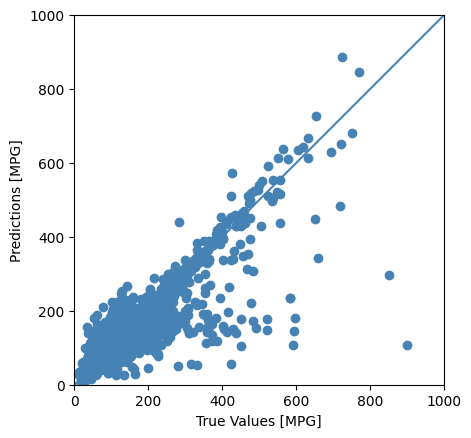

In [ ]:
test_pred = dnn_model.predict(x_test).flatten()

plt.axes(aspect='equal')
plt.scatter(y_test, test_pred, color = "steelblue")
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 1000]
plt.xlim(lims)
plt.ylim(lims)
_=plt.plot(lims, lims, color = "steelblue")

In [58]:
df["price"].describe()

count    17664.000000
mean       146.257869
std        397.090410
min          8.000000
25%         71.000000
50%        110.000000
75%        162.000000
max      25654.000000
Name: price, dtype: float64

Guardar el modelo 

In [59]:
dnn_model.save("red neuronal_airbnb.keras")

**Modelo en MlFlow**

In [24]:
#Definir ruta mlflow

mlflow.set_tracking_uri("file:./mlruns_regresion")  
mlflow.set_experiment("REGRESION_DNN_V1")


with mlflow.start_run(run_name="RUN_DNN_REGRESION 8"):

    # Hiperparámetros
    learning_rate = 1e-1
    epochs = 100
    val_split = 0.3

   #Definir capas y neuronas de la red 
    dnn_model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(x_train.shape[1],)),
        norm,
        tf.keras.layers.Dense(13, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1)    # salida de regresión
    ])
    #Definir función de pérdida y optimizador
    dnn_model.compile(
        loss='mean_absolute_error',
        optimizer=tf.keras.optimizers.Adam(learning_rate)
    )

    # 3.2 Parámetros del modelo
    mlflow.log_params({
        "modelo": "DNN_regresion",
        "hidden_1_units": 12,
        "hidden_2_units": 16,
        "activacion": "elu+1",
        "learning_rate": learning_rate,
        "epochs_max": epochs,
        "validation_split": val_split,
        "input_dim": int(x_train.shape[1])
    })

   
    #  Entrenar modelo

    history = dnn_model.fit(
        x_train,
        y_train,
        validation_split=val_split,
        epochs=epochs,
        verbose=1
    )

 
    # Evaluar en test
 
    test_mae = float(dnn_model.evaluate(x_test, y_test, verbose=0))

    # Métricas finales de train/val
    train_loss_final = float(history.history["loss"][-1])
    val_loss_final   = float(history.history["val_loss"][-1])

    # Ingresar las metricas a MLflow

    mlflow.log_metrics({
        "train_mae_final": train_loss_final,
        "val_mae_final":   val_loss_final,
        "test_mae":        test_mae
    })

    # Métricas por época (curvas de entrenamiento)

    for epoch in range(len(history.history["loss"])):
        mlflow.log_metric("loss",     float(history.history["loss"][epoch]),     step=epoch)
        mlflow.log_metric("val_loss", float(history.history["val_loss"][epoch]), step=epoch)

    # Guardar modelo en MLflow
    mlflow.tensorflow.log_model(dnn_model, "model")

    mlflow.end_run(status="FINISHED")


Epoch 1/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 49.1903 - val_loss: 45.0686
Epoch 2/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 42.8893 - val_loss: 50.4609
Epoch 3/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 42.2930 - val_loss: 44.5652
Epoch 4/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 41.1449 - val_loss: 43.1823
Epoch 5/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 39.4496 - val_loss: 41.9461
Epoch 6/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 38.9497 - val_loss: 41.9090
Epoch 7/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 38.2789 - val_loss: 42.0006
Epoch 8/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 37.5299 - val_loss: 57.9055
Epoch 9/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 37.6917 - val_loss: 41.6412
Epoch 10/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 36.9839 - val_loss: 42.2666
Epoch 11/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 38.6885 - val_loss: 39.0736
Epoch 12/100
310/31

2025/11/28 19:28:00 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/28 19:28:00 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2025/11/28 19:28:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
